In [1]:
import vtk
import numpy as np
from skxray.io import vtk_tools, tiff_io
import pims
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from vtk.numpy_interface import dataset_adapter as dsa

from vtk.numpy_interface import algorithms as algs 


In [116]:
_prism_data = {
        'red': lambda x: 0.75 * np.sin((x * 20.9 + 0.25) * np.pi) + 0.67,
        'green': lambda x: 0.75 * np.sin((x * 20.9 - 0.25) * np.pi) + 0.33,
        'blue': lambda x: -1.1 * np.sin((x * 20.9) * np.pi),
}
datad = {'prism': _prism_data}

cm_label = ((0.0, 255.0, 0.0), # 1 -- Lime Green
            (255.0, 223.0, 0.0), # 2 -- Golden yellow
            (135.0, 206.0, 250.0), # 3 -- Sky Blue
            (220.0, 20.0, 60.0), # 4 -- Crimson
            (0.0, 128.0, 0.0), # 5 -- Green
            (255.0, 140.0, 0.0), # 6 -- Dark Orange
            (0.0, 0.0, 255.0), # 7 -- Blue
            (138.0, 43.0, 226.0), # 8 -- Blue Violet
            (46.0, 139.0, 87.0), # 9 -- Sea Green
            (128.0, 0.0, 0.0), # 10 -- Maroon
            (0.0, 128.0, 128.0), # 11 -- Teal
            (160.0, 82.0, 45.0), # 12 -- Sienna 
           )

In [127]:
val=[0, 1, 2, 3, 4, 5]
for label_val in val:
    print 'val = ' + str(label_val)
    print 'red' + str(_prism_data['red'](label_val))
    print 'green' + str(_prism_data['green'](label_val))
    print 'blue' + str(_prism_data['blue'](label_val))

val = 0
red1.20033008589
green-0.20033008589
blue-0.0
val = 1
red0.329507125195
green0.998254893141
blue-0.339918693812
val = 2
red0.78732584878
green-0.410766255446
blue0.646563777522
val = 3
red0.78732584878
green1.07076625545
blue-0.889918693812
val = 4
red0.329507125195
green-0.338254893141
blue1.04616216792
val = 5
red1.20033008589
green0.86033008589
blue-1.1


In [120]:
datad['prism']['blue']

<function <lambda> at 0x7fc143224b90>


# Load Demo Data

The three initial data sets included in this example consist of a cropped region of a packed bead column (porous medium) within which biofilm was grown as part of an experiment examining the affect of fluid flow rate (hydraulic loading) on biofilm growth and development.

In [3]:
# Segmented data file names
fnames = ['../data/mCT/demoThresh_Beads1.tif', '../data/mCT/demoThresh_Biofilm1.tif', '../data/mCT/demoThresh_Barium1.tif', '../data/mCT/LabelField.tif']

for index, val in enumerate(['beads', 'biofilm', 'barium', 'label_field']):
    #globals()[val] = pims.TiffStack(fnames[index])
    globals()[val] = tiff_io.read_tiff(fnames[index])
    

In [4]:
print np.amax(label_field)
print np.amin(label_field)
print np.unique(label_field)
label_field.shape

255
85
[ 85 170 255]


(100, 425, 425)

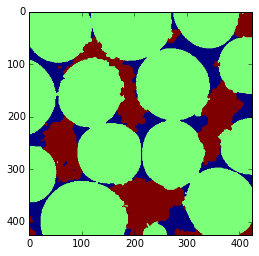

In [5]:
plt.imshow(label_field[50,:,:])

1
0


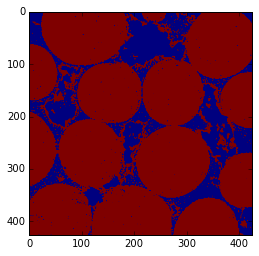

In [115]:
beads[100]
#label_field[50]
plt.imshow(beads[50,:,:])
print np.amax(beads)
print np.amin(beads)

In [72]:
# Convert label field to VTK object
dataImporter = vtk_tools.np_to_vtk(label_field)
#dataImporter = vtk_tools.np_to_vtk(label_field)

In [75]:
print dataImporter.GetOutput()
print dataImporter.GetInformation()

vtkImageData (0x2164fd0)
  Debug: Off
  Modified Time: 224787
  Reference Count: 2
  Registered Events: (none)
  Information: 0x3cb1670
  Data Released: False
  Global Release Data: Off
  UpdateTime: 0
  Field Data:
    Debug: Off
    Modified Time: 224784
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 0
  Number Of Cells: 0
  Cell Data:
    Debug: Off
    Modified Time: 224787
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
    Interpolate Flags: ( 1 1 1 1 1 0 0 1 )
    Pass Through Flags: ( 1 1 1 1 1 1 1 1 )
    Scalars: (none)
    Vectors: (none)
    Normals: (none)
    TCoords: (none)
    Tensors: (none)
    GlobalIds: (none)
    PedigreeIds: (none)
    EdgeFlag: (none)
  Point Data:
    Debug: Off
    Modified Time: 224786
    Reference Count: 1
    Registered

In [97]:
vol = vtk.vtkImageData()
vol.SetDimensions(beads.shape[0], beads.shape[1], beads.shape[2])
vol.SetOrigin(0,0,0)
vol.SetSpacing(1,1,1)

vtk_data = vtk.util.numpy_support.numpy_to_vtk(beads.ravel(), deep=True)

vol.GetPointData().SetScalars(vtk_data)

0

In [98]:
print vtk_data.GetInformation()
print vtk_data.GetDataTypeAsString()
print vtk_data.GetDataTypeMin()
print vtk_data.GetDataTypeValueMax()
print vtk_data.GetMaxDiscreteValues()
print vtk_data.GetNumberOfComponentsMaxValue()
print vtk_data.GetNumberOfComponentsMinValue()
print vtk_data.GetValueRange()
print vtk_data.GetValue(1000)

vtkInformation (0x57a7cc0)
  Debug: Off
  Modified Time: 224958
  Reference Count: 2
  Registered Events: (none)


unsigned char
0.0
255
32
2147483647
1
(0, 1)
1


In [99]:
print vol.GetCellData()

vtkCellData (0xd76420)
  Debug: Off
  Modified Time: 224927
  Reference Count: 2
  Registered Events: (none)
  Number Of Arrays: 0
  Number Of Components: 0
  Number Of Tuples: 0
  Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
  Interpolate Flags: ( 1 1 1 1 1 0 0 1 )
  Pass Through Flags: ( 1 1 1 1 1 1 1 1 )
  Scalars: (none)
  Vectors: (none)
  Normals: (none)
  TCoords: (none)
  Tensors: (none)
  GlobalIds: (none)
  PedigreeIds: (none)
  EdgeFlag: (none)




In [100]:
vol.GetDataDimension()

3

In [101]:
print vtk_data.GetDataTypeValueMax()
print vtk_data.GetDataTypeValueMin()

255
0


In [103]:
opacity_xfer_func = vtk.vtkPiecewiseFunction()
opacity_xfer_func.AddPoint(0, 0.2)
opacity_xfer_func.AddPoint(1, 0.5)

1

In [104]:
color_xfer_func = vtk.vtkColorTransferFunction()
color_xfer_func.AddRGBPoint(0.0, 0.0, 0.0, 0.0)
color_xfer_func.AddRGBPoint(1.0, 0.0, 1, 0.0)

1

In [105]:
volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(color_xfer_func)
volumeProperty.SetScalarOpacity(opacity_xfer_func)

In [106]:
compositFunc = vtk.vtkVolumeRayCastCompositeFunction()
volumeMapper = vtk.vtkVolumeRayCastMapper()
volumeMapper.SetVolumeRayCastFunction(compositFunc)
volumeMapper.SetInputData(vol)

In [107]:
actorVolume = vtk.vtkVolume()
actorVolume.SetMapper(volumeMapper)
actorVolume.SetProperty(volumeProperty)

In [108]:
def createDummyRenderer():
    renderer = vtk.vtkRenderer()
    renderer.SetBackground(0.5,0.5,0.5)
    
    camera = renderer.MakeCamera()
    camera.SetPosition(-256,-256,512)
    camera.SetFocalPoint(0.0, 0.0, 255.0)
    camera.SetViewAngle(30.0)
    camera.SetViewUp(0.46, -0.80, -0.38)
    
    renderer.SetActiveCamera(camera)
    
    return renderer


In [109]:
renderWindow_tst = vtk.vtkRenderWindow()

In [110]:
renderer = createDummyRenderer()
renderer.AddActor(actorVolume)

In [111]:
vtk_tools.vtk_viewer(vol, volumeProperty, 800,800)

In [7]:
dataImporter.GetDataExtent()

(0, 426, 0, 426, 0, 101)

In [8]:
dataImporter.GetDataScalarType()

3

In [9]:
dataImporter.GetNumberOfScalarComponents()

1

In [10]:
beads.shape

(101, 426, 426)

In [11]:
dataImporter.SetDataExtent(dataImporter.GetDataExtent())

In [12]:
dataImporter.SetWholeExtent(dataImporter.GetWholeExtent())

In [13]:
alphaChannelFunc = vtk.vtkPiecewiseFunction()
alphaChannelFunc.AddPoint(0, 0.0)
alphaChannelFunc.AddPoint(1, 0.2)

1

In [14]:
# This class stores color data and can create color tables from a few color points. For this demo, we want the three cubes
# to be of the colors red green and blue.
colorFunc = vtk.vtkColorTransferFunction()
colorFunc.AddRGBPoint(1, 1.0, 0.0, 0.0)


0

In [15]:
volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(colorFunc)
volumeProperty.SetScalarOpacity(alphaChannelFunc)


In [13]:
volumeProperty = vtk_tools.vtk_vis_props(dataImporter, label_field, [0.05, 0.1, 0.2])

In [14]:
vtk_tools.vtk_viewer(dataImporter, volumeProperty, width=425, height=425)

In [15]:
vtk_tools.ipython_vtk_viewer(volumeProperty)

NameError: global name 'vtkRenderWindow' is not defined

In [18]:
dmc = vtk.vtkDiscreteMarchingCubes()
dmc.SetInputConnection(dataImporter.GetOutputPort())
dmc.GenerateValues(1,1,1)
dmc.Update()

In [19]:
tmp = 5

In [ ]:
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(dmc.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(0.5,0.5,0.5)
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(renderer)
interactiveRender = vtk.vtkRenderWindowInteractor()
interactiveRender.SetRenderWindow(renWin)

camera = renderer.MakeCamera()
camera.SetPosition(-500.0, 245.5, 122.0)
camera.SetFocalPoint(301.0, 245.5, 122.0)
camera.SetViewAngle(30.0)
camera.SetRoll(-90.0)
renderer.SetActiveCamera(camera)
renWin.SetSize(600,600)

interactiveRender.Initialize()
renWin.Render()
interactiveRender.Start()

In [16]:
dataImporter.GetOutputPort()

AttributeError: mro

(vtkAlgorithmOutput)0x7fcaa6425788